## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.050872  0.706057 -0.365262  1.064294  0.568007  1.102023
1 -1.205201  0.446545  0.097638  0.043442 -0.314697 -0.787716
2 -0.025112  0.815868  0.675608 -1.327611  1.734046  0.102897
3  0.851545 -1.826248 -1.256659 -0.873049 -1.405724 -1.658352
4 -0.834161  1.197614  0.187793 -1.099826 -0.553549 -0.877715


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9285443	total: 46.8ms	remaining: 46.8s
1:	learn: 0.9194298	total: 47.2ms	remaining: 23.6s
2:	learn: 0.9105410	total: 47.6ms	remaining: 15.8s
3:	learn: 0.9011587	total: 48ms	remaining: 12s
4:	learn: 0.8930776	total: 48.4ms	remaining: 9.64s
5:	learn: 0.8830294	total: 48.8ms	remaining: 8.08s
6:	learn: 0.8743871	total: 49.2ms	remaining: 6.97s
7:	learn: 0.8642636	total: 49.5ms	remaining: 6.14s
8:	learn: 0.8561792	total: 49.9ms	remaining: 5.5s
9:	learn: 0.8487268	total: 50.4ms	remaining: 4.99s
10:	learn: 0.8407233	total: 50.8ms	remaining: 4.57s
11:	learn: 0.8321020	total: 51.2ms	remaining: 4.22s
12:	learn: 0.8236912	total: 51.6ms	remaining: 3.92s
13:	learn: 0.8162916	total: 52.1ms	remaining: 3.67s
14:	learn: 0.8087122	total: 52.5ms	remaining: 3.45s
15:	learn: 0.8009799	total: 52.9ms	remaining: 3.25s
16:	learn: 0.7937753	total: 53.3ms	remaining: 3.08s
17:	learn: 0.7868138	total: 53.7ms	remaining: 2.93s
18:	learn: 0.7802385	total: 54.2ms	remaining: 2.8

195:	learn: 0.1986546	total: 122ms	remaining: 500ms
196:	learn: 0.1977858	total: 123ms	remaining: 499ms
197:	learn: 0.1963543	total: 123ms	remaining: 498ms
198:	learn: 0.1954995	total: 123ms	remaining: 496ms
199:	learn: 0.1945290	total: 124ms	remaining: 495ms
200:	learn: 0.1935672	total: 124ms	remaining: 493ms
201:	learn: 0.1919110	total: 124ms	remaining: 491ms
202:	learn: 0.1909445	total: 125ms	remaining: 490ms
203:	learn: 0.1902037	total: 125ms	remaining: 488ms
204:	learn: 0.1886271	total: 125ms	remaining: 486ms
205:	learn: 0.1873108	total: 126ms	remaining: 485ms
206:	learn: 0.1859407	total: 126ms	remaining: 483ms
207:	learn: 0.1851375	total: 126ms	remaining: 482ms
208:	learn: 0.1836142	total: 127ms	remaining: 480ms
209:	learn: 0.1824309	total: 127ms	remaining: 479ms
210:	learn: 0.1813127	total: 128ms	remaining: 478ms
211:	learn: 0.1801584	total: 128ms	remaining: 476ms
212:	learn: 0.1790429	total: 128ms	remaining: 474ms
213:	learn: 0.1776412	total: 129ms	remaining: 473ms
214:	learn: 

461:	learn: 0.0406659	total: 222ms	remaining: 259ms
462:	learn: 0.0405869	total: 223ms	remaining: 258ms
463:	learn: 0.0403043	total: 223ms	remaining: 258ms
464:	learn: 0.0400372	total: 224ms	remaining: 257ms
465:	learn: 0.0399605	total: 224ms	remaining: 257ms
466:	learn: 0.0396576	total: 224ms	remaining: 256ms
467:	learn: 0.0393868	total: 225ms	remaining: 255ms
468:	learn: 0.0391094	total: 225ms	remaining: 255ms
469:	learn: 0.0389521	total: 225ms	remaining: 254ms
470:	learn: 0.0386999	total: 226ms	remaining: 254ms
471:	learn: 0.0384073	total: 226ms	remaining: 253ms
472:	learn: 0.0381518	total: 227ms	remaining: 253ms
473:	learn: 0.0378920	total: 227ms	remaining: 252ms
474:	learn: 0.0376024	total: 227ms	remaining: 251ms
475:	learn: 0.0373929	total: 228ms	remaining: 251ms
476:	learn: 0.0371874	total: 228ms	remaining: 250ms
477:	learn: 0.0369506	total: 229ms	remaining: 250ms
478:	learn: 0.0366765	total: 229ms	remaining: 249ms
479:	learn: 0.0366050	total: 229ms	remaining: 249ms
480:	learn: 

726:	learn: 0.0101892	total: 331ms	remaining: 124ms
727:	learn: 0.0101230	total: 331ms	remaining: 124ms
728:	learn: 0.0100713	total: 331ms	remaining: 123ms
729:	learn: 0.0100236	total: 332ms	remaining: 123ms
730:	learn: 0.0099708	total: 332ms	remaining: 122ms
731:	learn: 0.0099195	total: 333ms	remaining: 122ms
732:	learn: 0.0098965	total: 333ms	remaining: 121ms
733:	learn: 0.0098335	total: 333ms	remaining: 121ms
734:	learn: 0.0097766	total: 334ms	remaining: 120ms
735:	learn: 0.0097206	total: 334ms	remaining: 120ms
736:	learn: 0.0096817	total: 335ms	remaining: 119ms
737:	learn: 0.0096472	total: 335ms	remaining: 119ms
738:	learn: 0.0095985	total: 336ms	remaining: 119ms
739:	learn: 0.0095510	total: 336ms	remaining: 118ms
740:	learn: 0.0095290	total: 337ms	remaining: 118ms
741:	learn: 0.0094957	total: 337ms	remaining: 117ms
742:	learn: 0.0094522	total: 337ms	remaining: 117ms
743:	learn: 0.0094153	total: 338ms	remaining: 116ms
744:	learn: 0.0093628	total: 338ms	remaining: 116ms
745:	learn: 

996:	learn: 0.0039139	total: 428ms	remaining: 1.29ms
997:	learn: 0.0038967	total: 429ms	remaining: 859us
998:	learn: 0.0038823	total: 429ms	remaining: 429us
999:	learn: 0.0038687	total: 430ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

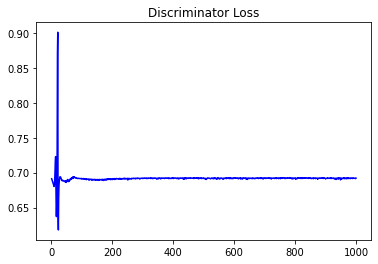

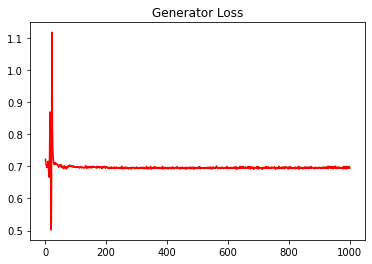

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05458597035819598


#### Sanity Checks 

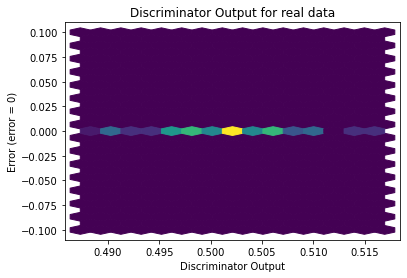

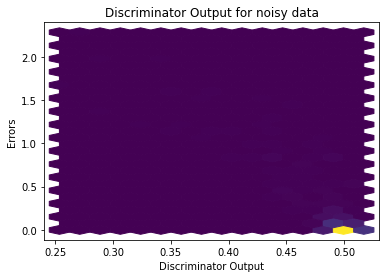

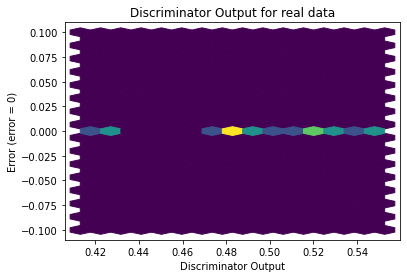

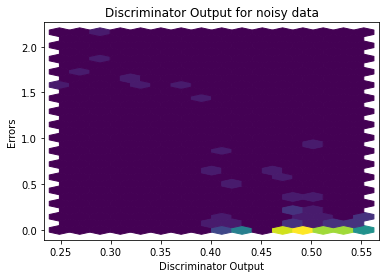

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


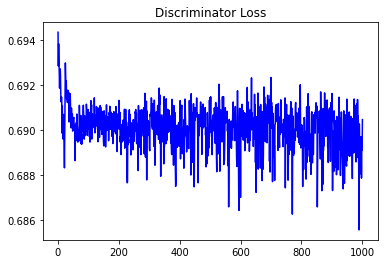

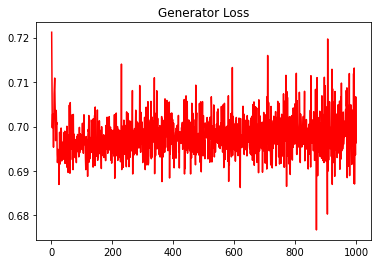

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03621048606244204


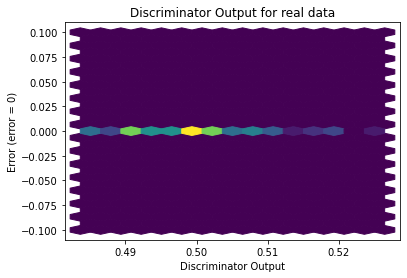

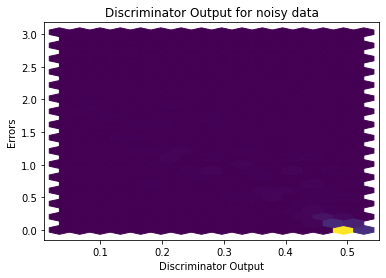

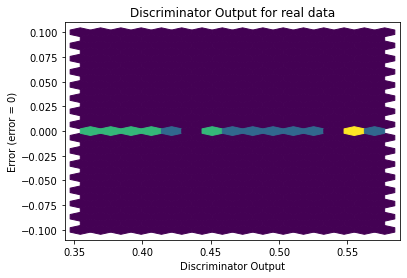

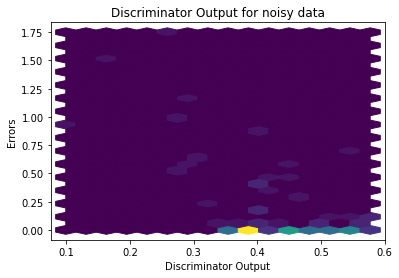

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4023]], device='cuda:0', requires_grad=True)
